<a href="https://colab.research.google.com/github/Pointdexter99/ML-models/blob/main/Convolutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

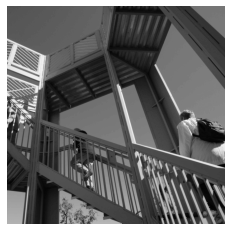

In [2]:
import cv2
import numpy as np
from scipy import misc
i = misc.ascent()
import matplotlib.pyplot as plt
plt.grid(False)
plt.axis('Off')
plt.imshow(i)
plt.gray()
plt.show()

In [4]:
i_trans = np.copy(i)
size_x = i_trans.shape[0]
size_y = i_trans.shape[1]
filter = ([-1,2,-1], [0,0,0], [1,2,1])
weight = 1

In [6]:
for x in range(1,size_x-1):
  for y in range(1,size_y-1):
      output_pixel = 0.0
      output_pixel = output_pixel + (i[x - 1, y-1] * filter[0][0])
      output_pixel = output_pixel + (i[x, y-1] * filter[0][1])
      output_pixel = output_pixel + (i[x + 1, y-1] * filter[0][2])
      output_pixel = output_pixel + (i[x-1, y] * filter[1][0])
      output_pixel = output_pixel + (i[x, y] * filter[1][1])
      output_pixel = output_pixel + (i[x+1, y] * filter[1][2])
      output_pixel = output_pixel + (i[x-1, y+1] * filter[2][0])
      output_pixel = output_pixel + (i[x, y+1] * filter[2][1])
      output_pixel = output_pixel + (i[x+1, y+1] * filter[2][2])
      output_pixel = output_pixel * weight
      if(output_pixel<0):
        output_pixel=0
      if(output_pixel>255):
        output_pixel=255
      i_trans[x, y] = output_pixel

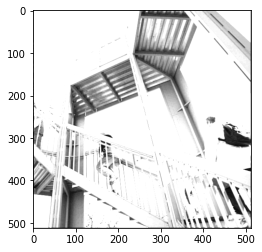

In [8]:
plt.gray()
plt.grid(False)
plt.imshow(i_trans)
#plt.axis('off')
plt.show()

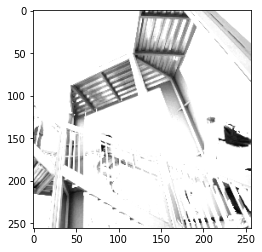

In [10]:
new_x = int(size_x/2)
new_y = int(size_y/2)
newImage = np.zeros((new_x, new_y))
for x in range(0, size_x, 2):
  for y in range(0, size_y, 2):
    pixels = []
    pixels.append(i_trans[x, y])
    pixels.append(i_trans[x+1, y])
    pixels.append(i_trans[x, y+1])
    pixels.append(i_trans[x+1, y+1])
    pixels.sort(reverse=True)
    newImage[int(x/2),int(y/2)] = pixels[0]
 
# Plot the image. Note the size of the axes -- now 256 pixels instead of 512
plt.gray()
plt.grid(False)
plt.imshow(newImage)
#plt.axis('off')
plt.show()